<a href="https://colab.research.google.com/github/umleeho1/DataAnalysis/blob/main/chap9pb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

raw_data = pd.read_csv('/content/survey_results_public.csv')

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [23]:
raw_data.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [24]:
data_analyst_data = raw_data[raw_data['DevType'].isin(['Data scientist or machine learning specialist', 'Data or business analyst'])]
data_analyst_data['DevType']

240                           Data or business analyst
400                           Data or business analyst
463      Data scientist or machine learning specialist
1089     Data scientist or machine learning specialist
1704     Data scientist or machine learning specialist
                             ...                      
73053                         Data or business analyst
73054                         Data or business analyst
73064    Data scientist or machine learning specialist
73204                         Data or business analyst
73264    Data scientist or machine learning specialist
Name: DevType, Length: 742, dtype: object

In [25]:
languages = data_analyst_data['LanguageHaveWorkedWith']
languages

240                   HTML/CSS;Python;Ruby;SQL;VBA
400                      Bash/Shell;C++;Python;SQL
463                          Bash/Shell;Python;SQL
1089                                        Python
1704             Elixir;Python;Rust;SQL;TypeScript
                           ...                    
73053                        PowerShell;Python;SQL
73054                                            R
73064                        Java;Python;Scala;SQL
73204          Bash/Shell;HTML/CSS;Julia;R;SQL;VBA
73264    Bash/Shell;HTML/CSS;JavaScript;Python;SQL
Name: LanguageHaveWorkedWith, Length: 742, dtype: object

In [26]:
languages = languages.str.split(';')
languages

240                   [HTML/CSS, Python, Ruby, SQL, VBA]
400                       [Bash/Shell, C++, Python, SQL]
463                            [Bash/Shell, Python, SQL]
1089                                            [Python]
1704             [Elixir, Python, Rust, SQL, TypeScript]
                              ...                       
73053                          [PowerShell, Python, SQL]
73054                                                [R]
73064                         [Java, Python, Scala, SQL]
73204         [Bash/Shell, HTML/CSS, Julia, R, SQL, VBA]
73264    [Bash/Shell, HTML/CSS, JavaScript, Python, SQL]
Name: LanguageHaveWorkedWith, Length: 742, dtype: object

In [27]:
languages.dropna(inplace=True)

lang_list = languages.to_list()

lang_list[:10]

[['HTML/CSS', 'Python', 'Ruby', 'SQL', 'VBA'],
 ['Bash/Shell', 'C++', 'Python', 'SQL'],
 ['Bash/Shell', 'Python', 'SQL'],
 ['Python'],
 ['Elixir', 'Python', 'Rust', 'SQL', 'TypeScript'],
 ['Python'],
 ['Bash/Shell',
  'C++',
  'HTML/CSS',
  'JavaScript',
  'Python',
  'Rust',
  'SQL',
  'TypeScript'],
 ['Python', 'SQL'],
 ['Bash/Shell', 'Go', 'HTML/CSS', 'Python'],
 ['Bash/Shell', 'Python', 'Rust']]

In [28]:
target_langs = ['Python', 'R', 'SQL', 'MATLAB', 'Go', 'SAS', 'Scala', 'Julia', 'Java', 'JavaScript']


In [29]:
revised_lang_list = []


for lang in lang_list:

  filtered = [x for x in lang if x in target_langs]

  revised_lang_list.append(filtered)


revised_lang_list

[['Python', 'SQL'],
 ['Python', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['Python', 'SQL'],
 ['Go', 'Python'],
 ['Python'],
 ['Python'],
 ['Go', 'Java'],
 ['JavaScript', 'Python'],
 ['Python', 'R', 'SQL'],
 ['Julia', 'Python', 'R'],
 ['Python', 'SQL'],
 ['JavaScript', 'Python'],
 ['Python', 'SQL'],
 ['Julia', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python', 'R', 'SAS', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['JavaScript', 'Python', 'R', 'SAS', 'SQL'],
 ['Python', 'Scala', 'SQL'],
 ['Python', 'R'],
 ['Python', 'R'],
 ['JavaScript', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Python', 'R', 'SQL'],
 ['JavaScript', 'Python'],
 ['SQL'],
 ['Python', 'R', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Julia', 'Python', 'R', 'SQL'],
 ['Java', 'Python'],
 ['Python'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['Java', 'JavaScript', 'Python'],
 ['JavaSc

In [30]:
#전처리
from mlxtend.preprocessing import TransactionEncoder

#생성
te = TransactionEncoder()


te_ary = te.fit(revised_lang_list).transform(revised_lang_list)
te_ary

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False,  True, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True, False],
       [False, False,  True, ..., False,  True, False]])

In [31]:
new_languages = pd.DataFrame(te_ary, columns=te.columns_)
new_languages

,Go,Java,JavaScript,Julia,MATLAB,Python,R,SAS,SQL,Scala
0,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
724,False,False,False,False,False,True,False,False,True,False
725,False,False,False,False,False,False,True,False,False,False
726,False,True,False,False,False,True,False,False,True,True
727,False,False,False,True,False,False,True,False,True,False


In [44]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(new_languages, min_support=0.01, use_colnames=True)


In [45]:
freq_items.sort_values(['support'],ascending=False).head(20)

,support,itemsets
5,0.855967,(Python)
8,0.603567,(SQL)
32,0.517147,"(Python, SQL)"
6,0.292181,(R)
30,0.237311,"(R, Python)"
2,0.231824,(JavaScript)
35,0.213992,"(R, SQL)"
20,0.211248,"(Python, JavaScript)"
64,0.182442,"(R, Python, SQL)"
22,0.160494,"(JavaScript, SQL)"


In [46]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

,support,itemsets,length
0,0.030178,(Go),1
1,0.116598,(Java),1
2,0.231824,(JavaScript),1
3,0.053498,(Julia),1
4,0.056241,(MATLAB),1
...,...,...,...
78,0.017833,"(R, Python, Julia, SQL)",4
79,0.019204,"(R, Python, MATLAB, SQL)",4
80,0.021948,"(R, Python, SAS, SQL)",4
81,0.012346,"(R, Python, Scala, SQL)",4


In [47]:
rules = association_rules(freq_items, min_threshold=0.01)
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ','.join(list(x)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_str,consequents_str
0,(Go),(JavaScript),0.030178,0.231824,0.013717,0.454545,1.960732,0.006721,1.408322,Go,JavaScript
1,(JavaScript),(Go),0.231824,0.030178,0.013717,0.059172,1.960732,0.006721,1.030817,JavaScript,Go
2,(Go),(Python),0.030178,0.855967,0.028807,0.954545,1.115166,0.002975,3.168724,Go,Python
3,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,0.002975,1.003597,Python,Go
4,(Go),(SQL),0.030178,0.603567,0.017833,0.590909,0.979029,-0.000382,0.969060,Go,SQL
...,...,...,...,...,...,...,...,...,...,...,...
437,(Python),"(R, Java, JavaScript, SQL)",0.855967,0.013717,0.013717,0.016026,1.168269,0.001976,1.002346,Python,"R,Java,JavaScript,SQL"
438,(Java),"(R, Python, JavaScript, SQL)",0.116598,0.048011,0.013717,0.117647,2.450420,0.008119,1.078921,Java,"R,Python,JavaScript,SQL"
439,(SQL),"(R, Python, Java, JavaScript)",0.603567,0.013717,0.013717,0.022727,1.656818,0.005438,1.009219,SQL,"R,Python,Java,JavaScript"
440,(JavaScript),"(R, Python, Java, SQL)",0.231824,0.016461,0.013717,0.059172,3.594675,0.009901,1.045397,JavaScript,"R,Python,Java,SQL"


In [48]:
rules_for_python = rules[
    rules.apply(lambda x: ('Python' in x['antecedents'] and len(x['antecedents']) == 1)
    , axis=1)]
rules_for_python.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_str,consequents_str
3,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,0.002975,1.003597,Python,Go
8,(Python),(Java),0.855967,0.116598,0.098765,0.115385,0.989593,-0.001039,0.998628,Python,Java
20,(Python),(JavaScript),0.855967,0.231824,0.211248,0.246795,1.064577,0.012814,1.019876,Python,JavaScript
28,(Python),(Julia),0.855967,0.053498,0.043896,0.051282,0.958580,-0.001897,0.997664,Python,Julia
34,(Python),(MATLAB),0.855967,0.056241,0.056241,0.065705,1.168269,0.008101,1.010129,Python,MATLAB
41,(Python),(R),0.855967,0.292181,0.237311,0.277244,0.948876,-0.012786,0.979333,Python,R
42,(Python),(SAS),0.855967,0.045267,0.037037,0.043269,0.955857,-0.001710,0.997911,Python,SAS
44,(Python),(SQL),0.855967,0.603567,0.517147,0.604167,1.000994,0.000514,1.001516,Python,SQL
46,(Python),(Scala),0.855967,0.039781,0.038409,0.044872,1.127984,0.004358,1.005330,Python,Scala
62,(Python),"(Go, JavaScript)",0.855967,0.013717,0.013717,0.016026,1.168269,0.001976,1.002346,Python,"Go,JavaScript"


In [49]:
high_lift_rules_for_python = rules_for_python[rules_for_python['lift'] > 1]
high_lift_rules_for_python

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_str,consequents_str
3,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,0.002975,1.003597,Python,Go
20,(Python),(JavaScript),0.855967,0.231824,0.211248,0.246795,1.064577,0.012814,1.019876,Python,JavaScript
34,(Python),(MATLAB),0.855967,0.056241,0.056241,0.065705,1.168269,0.008101,1.010129,Python,MATLAB
44,(Python),(SQL),0.855967,0.603567,0.517147,0.604167,1.000994,0.000514,1.001516,Python,SQL
46,(Python),(Scala),0.855967,0.039781,0.038409,0.044872,1.127984,0.004358,1.005330,Python,Scala
62,(Python),"(Go, JavaScript)",0.855967,0.013717,0.013717,0.016026,1.168269,0.001976,1.002346,Python,"Go,JavaScript"
68,(Python),"(Go, SQL)",0.855967,0.017833,0.017833,0.020833,1.168269,0.002568,1.003065,Python,"Go,SQL"
73,(Python),"(Java, JavaScript)",0.855967,0.064472,0.060357,0.070513,1.093699,0.005171,1.006499,Python,"Java,JavaScript"
92,(Python),"(R, Java)",0.855967,0.020576,0.019204,0.022436,1.090385,0.001592,1.001902,Python,"R,Java"
97,(Python),"(Java, SQL)",0.855967,0.076818,0.065844,0.076923,1.001374,0.000090,1.000114,Python,"Java,SQL"


In [53]:
import plotly.express as px


In [55]:
fig = px.scatter(
    high_lift_rules_for_python,
    x='support',
    y='confidence',
    size='lift',
    color='lift',
    hover_data=['antecedents_str', 'consequents_str']
)

fig.update_layout(
    xaxis_title='support',
    yaxis_title='confidence',
    font_family='Courier New',
    font_color='blue',
    title_font_family='Times New Roman',
    title_font_color='red',
    title='Support vs Confidence'
)

fig.show()

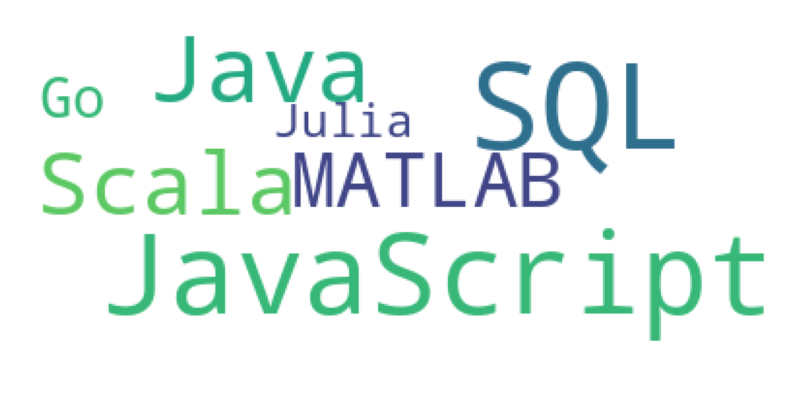

In [56]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white').generate(' '.join(high_lift_rules_for_python['consequents_str']))

plt.rcParams['figure.figsize'] = (10,10)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()